In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mnist_vae_mlp_torch_v1 import fetch_dataloaders, VAE, train, test

train_loader, test_loader = fetch_dataloaders()

In [3]:
model = VAE()
model

VAE(
  (fc): Linear(in_features=784, out_features=512, bias=True)
  (fc_mu): Linear(in_features=512, out_features=32, bias=True)
  (fc_log_var): Linear(in_features=512, out_features=32, bias=True)
  (fc_decode1): Linear(in_features=32, out_features=512, bias=True)
  (fc_decode2): Linear(in_features=512, out_features=784, bias=True)
)

In [4]:
train(model, train_loader, epochs=50, print_every=100)

[1, 100] loss: 115189.522109375, recon 110993.52734375, kld 4195.994670791626
[2, 100] loss: 78131.971015625, recon 69897.988046875, kld 8233.983188476563
[3, 100] loss: 68742.604765625, recon 58500.276328125, kld 10242.328505859376
[4, 100] loss: 64188.891015625, recon 52856.943828125, kld 11331.947607421875
[5, 100] loss: 61495.077421875, recon 49400.74609375, kld 12094.331416015624
[6, 100] loss: 59823.27140625, recon 47234.0796875, kld 12589.1918359375
[7, 100] loss: 58585.0949609375, recon 45733.2784765625, kld 12851.816455078126
[8, 100] loss: 57760.143515625, recon 44720.7876953125, kld 13039.355888671875
[9, 100] loss: 57050.1658203125, recon 43881.84140625, kld 13168.324345703126
[10, 100] loss: 56500.1777734375, recon 43240.0817578125, kld 13260.09599609375
[11, 100] loss: 56076.417421875, recon 42749.5873828125, kld 13326.830009765625
[12, 100] loss: 55794.8926953125, recon 42404.60796875, kld 13390.284658203125
[13, 100] loss: 55389.249765625, recon 41980.1671875, kld 13409

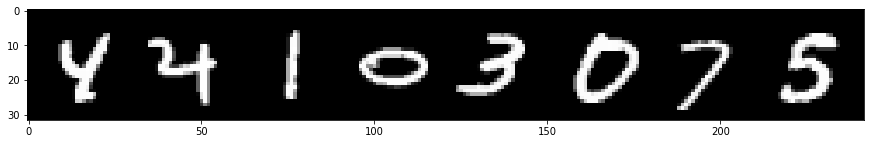

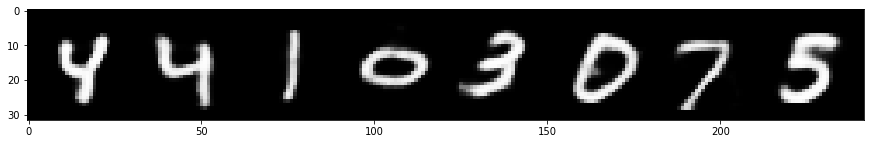

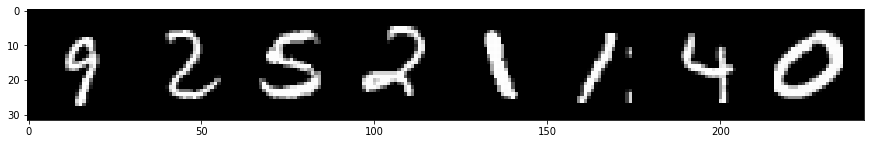

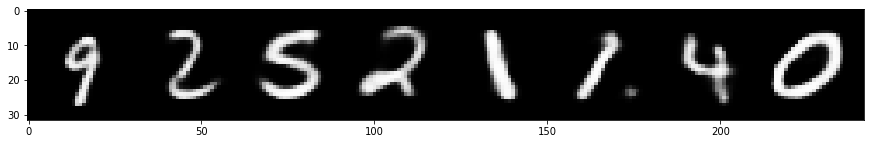

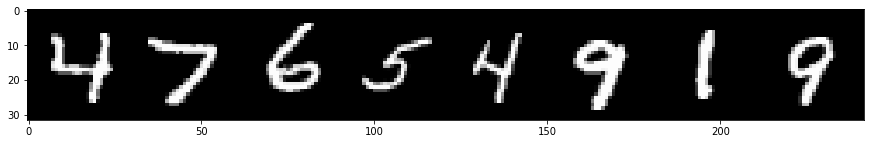

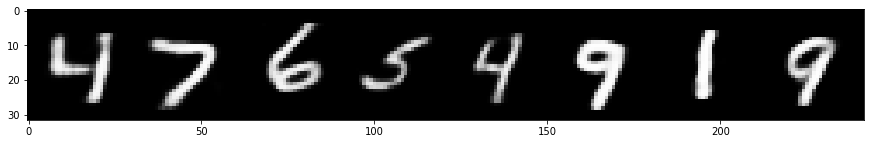

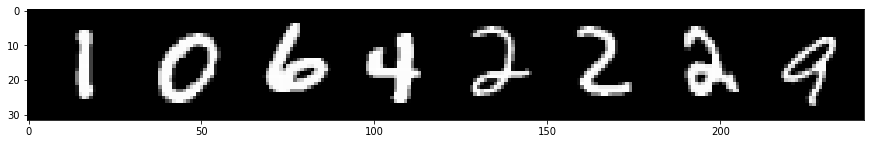

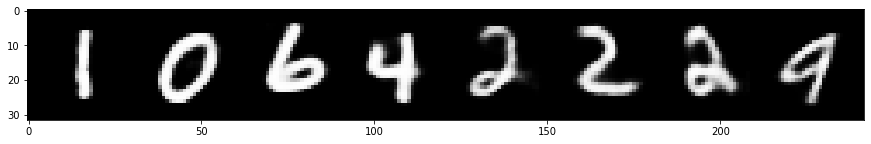

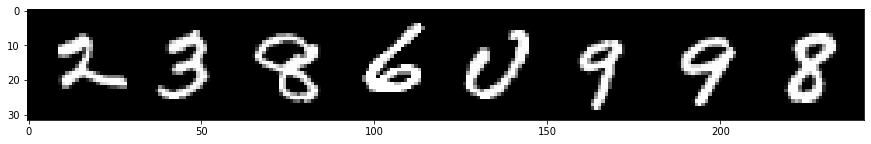

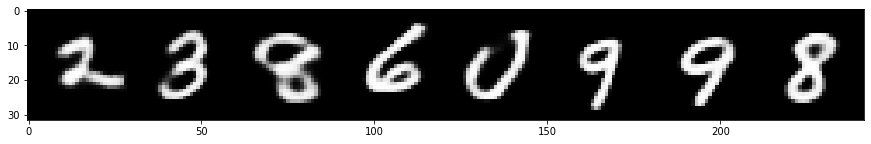

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def show(images_tensor):
    arrs = list(images_tensor)
    plt.figure(figsize=(15, 5))
    plt.imshow(np.transpose(torchvision.utils.make_grid(arrs), (1, 2, 0)))
    plt.show()

for i, (images, _) in enumerate(test_loader):
    if i >= 5:
        break
    show(images[:8])
    show(test(model, images[:8]))
    print('\n\n')

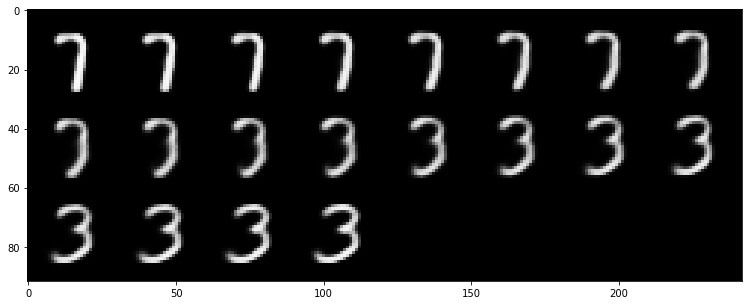

In [6]:
z_mu, z_log_var, z = model.encode(images.to('cuda'))
a = z_mu[2]
b = z_mu[7]
show(model.decode(torch.stack([i * a + (1 - i) * b for i in torch.arange(0, 1, 0.05)]).float().to('cuda')).detach().cpu())